In [94]:
import os,shutil
import numpy as np
import pandas as pd
import keras
from keras import models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Convolution2D,MaxPooling2D,Flatten,Dropout
from matplotlib import pyplot as plt


In [148]:
folder = os.listdir('Images1')

classes = ["cats","dogs","horses","humans"]
folder

['cats', 'dogs', 'horses', 'humans']

In [111]:
model = models.Sequential()

model.add(Convolution2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(Dropout(0.30))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))
model.summary()
          
                


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
dropout_9 (Dropout)          (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [117]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [134]:
train_gen = ImageDataGenerator(rescale = 1.0/255,horizontal_flip=True,vertical_flip=True,validation_split=0.2)
val_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory("Images1",
                                                batch_size = 32,
                                                target_size = (150,150),
                                                subset = 'training',
                                                class_mode = 'categorical')

val_generator = train_gen.flow_from_directory("Images1",
                                            batch_size = 32,
                                            target_size = (150,150),
                                            subset = 'validation',
                                            class_mode = 'categorical')

Found 648 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [135]:
train_generator.class_indices

{'cats': 0, 'dogs': 1, 'horses': 2, 'humans': 3}

In [136]:
x,y = train_generator.next()
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [138]:
print(train_generator.samples)
print(val_generator.samples)

648
160


In [139]:
hist = model.fit_generator(train_generator,
                           epochs = 30,
                           steps_per_epoch = 15,
                           validation_data = val_generator,
                           validation_steps=5)


Epoch 1/30
15/15 [==============================] - 48s 3s/step - loss: 1.1123 - accuracy: 0.6579 - val_loss: 0.7030 - val_accuracy: 0.7937
Epoch 2/30
15/15 [==============================] - 42s 3s/step - loss: 0.8769 - accuracy: 0.6750 - val_loss: 0.6051 - val_accuracy: 0.9000
Epoch 3/30
15/15 [==============================] - 41s 3s/step - loss: 0.7814 - accuracy: 0.7125 - val_loss: 0.5310 - val_accuracy: 0.8438
Epoch 4/30
15/15 [==============================] - 38s 3s/step - loss: 0.7577 - accuracy: 0.7396 - val_loss: 0.4420 - val_accuracy: 0.9000
Epoch 5/30
15/15 [==============================] - 38s 3s/step - loss: 0.6639 - accuracy: 0.7763 - val_loss: 0.5348 - val_accuracy: 0.8438
Epoch 6/30
15/15 [==============================] - 36s 2s/step - loss: 0.6101 - accuracy: 0.7829 - val_loss: 0.4383 - val_accuracy: 0.8625
Epoch 7/30
15/15 [==============================] - 36s 2s/step - loss: 0.5675 - accuracy: 0.7785 - val_loss: 0.4874 - val_accuracy: 0.8562
Epoch 8/30
15/15 [==

In [140]:
hist.history

{'loss': [1.1123141050338745,
  0.876852810382843,
  0.7813593149185181,
  0.7576913833618164,
  0.6639289259910583,
  0.610072910785675,
  0.5675361752510071,
  0.5154020190238953,
  0.5460081100463867,
  0.4862626791000366,
  0.4524089992046356,
  0.43391153216362,
  0.41575396060943604,
  0.3579821288585663,
  0.36052101850509644,
  0.2916997969150543,
  0.29626187682151794,
  0.26272571086883545,
  0.3143564760684967,
  0.22236458957195282,
  0.24060994386672974,
  0.21571436524391174,
  0.2064138501882553,
  0.22328034043312073,
  0.17599491775035858,
  0.15553231537342072,
  0.12289146333932877,
  0.14034810662269592,
  0.10234586894512177,
  0.15208859741687775],
 'accuracy': [0.6578947305679321,
  0.675000011920929,
  0.7124999761581421,
  0.7395833134651184,
  0.7763158082962036,
  0.7828947305679321,
  0.7785087823867798,
  0.8114035129547119,
  0.8104166388511658,
  0.8245614171028137,
  0.844298243522644,
  0.8640350699424744,
  0.8618420958518982,
  0.8793859481811523,
  0

In [141]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

In [142]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

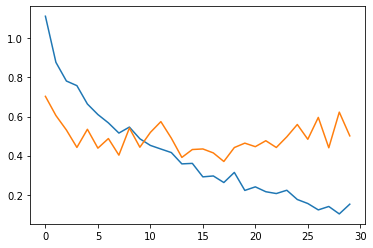

In [143]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val_loss')
plt.show()

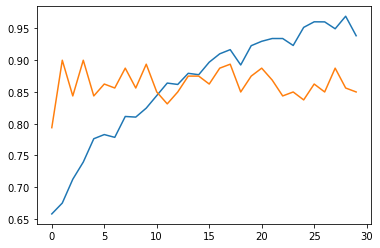

In [144]:
plt.plot(acc,label='acc')
plt.plot(val_acc,label='val_acc')
plt.show()

In [145]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.11557155102491379, 0.9737654328346252]